##### Imports

In [6]:
import asvFormula.bayesianNetworks.bayesianNetwork as bn
import asvFormula.experiments as exp
from asvFormula import asvRunResultsPath
from asvFormula.datasetManipulation import *
import asvFormula.exactASV as exact
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

cancerExactASVFile = asvRunResultsPath + "/cancerASVAndShapleyExact.csv"
childExactASVFile = asvRunResultsPath + "/childASVAndShapleyExact.csv"

seeds = [12,32,53,420,5]

In [7]:
from importlib import reload 
import asvFormula
import asvFormula.bayesianNetworks.bayesianNetwork as bn
import asvFormula.exactASV as exact

bn = reload(asvFormula.bayesianNetworks.bayesianNetwork)
exact = reload(asvFormula.exactASV)


## Generating the results 

### Running ASV for Cancer bayesian network

#### Train the decision tree model

In [8]:
for seed in seeds:
    cancerBNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.cancerNetworkConfig()

    BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(cancerBNmodel, variableToPredict, numberOfSamples, treeMaxDepth, seed)

    dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
    first_instance = dataNoPrediction.iloc[0]

    asvCalc = exact.ASV(cancerBNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, predictionFunction='Exact')

    if os.path.exists(cancerExactASVFile):
        os.remove(cancerExactASVFile) #Remove the file to reset results
    exp.writeASVAndShapleyIntoFile(first_instance, dataNoPrediction, dtTreeClassifier, asvCalc, cancerExactASVFile , valuesPerFeature, variableToPredict, seed)

  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.8083333333333333


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7416666666666667


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7583333333333333


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.725


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7583333333333333


### Running ASV for Child bayesian network

#### Train the decision tree model

In [16]:
for seed in seeds:
    treeBNChild, variableToPredict, numberOfSamples, treeMaxDepth = exp.childNetworkConfig()

    BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(treeBNChild, variableToPredict, numberOfSamples, treeMaxDepth, seed)

    dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
    first_instance = dataNoPrediction.iloc[0]

    asvCalc = exact.ASV(treeBNChild, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, predictionFunction='Exact')

    if os.path.exists(cancerExactASVFile):
        os.remove(cancerExactASVFile) #Remove the file to reset results
    exp.writeASVAndShapleyIntoFile(first_instance, dataNoPrediction, dtTreeClassifier, asvCalc, childExactASVFile , valuesPerFeature, variableToPredict, seed)
    #This takes 20 minutes to run

  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.674


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.6695


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.65


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.677


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.675


## Plotting the results 

### Converting to numerical data

In [3]:
plotsResultsFolder = 'results/plots/'

def dataframeFromCsv(path, seed=None):
    df = pd.read_csv(path)
    for column in ['ASV', 'Shapley']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    
    df = df[df['Seed'] == seed]
    df.name = path.split('/')[-1][:-4]
    return df

dfCancerExactDict = {}
for seed in seeds:
    dfCancerExactDict[seed] = dataframeFromCsv(cancerExactASVFile, seed=seed)


dfChildExactDict = {}
for seed in seeds:
    dfChildExactDict[seed] = dataframeFromCsv(childExactASVFile, seed=seed)

### Plotting ASV values for each feature

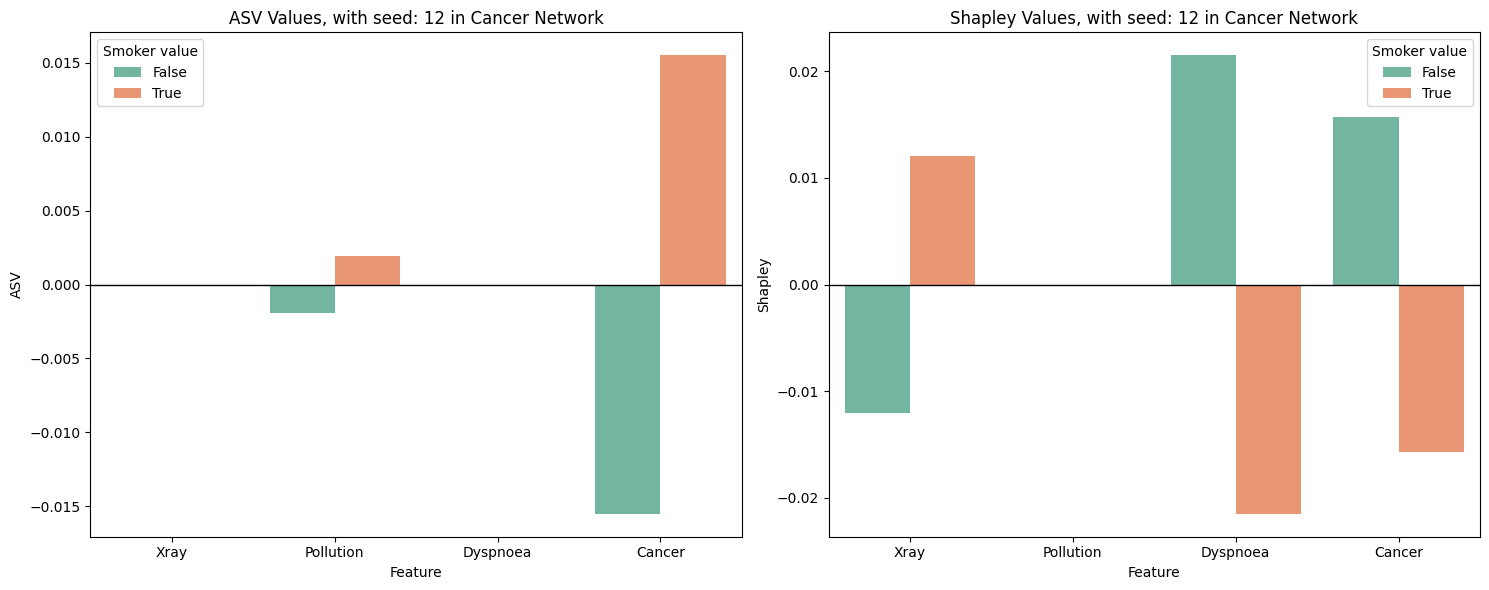

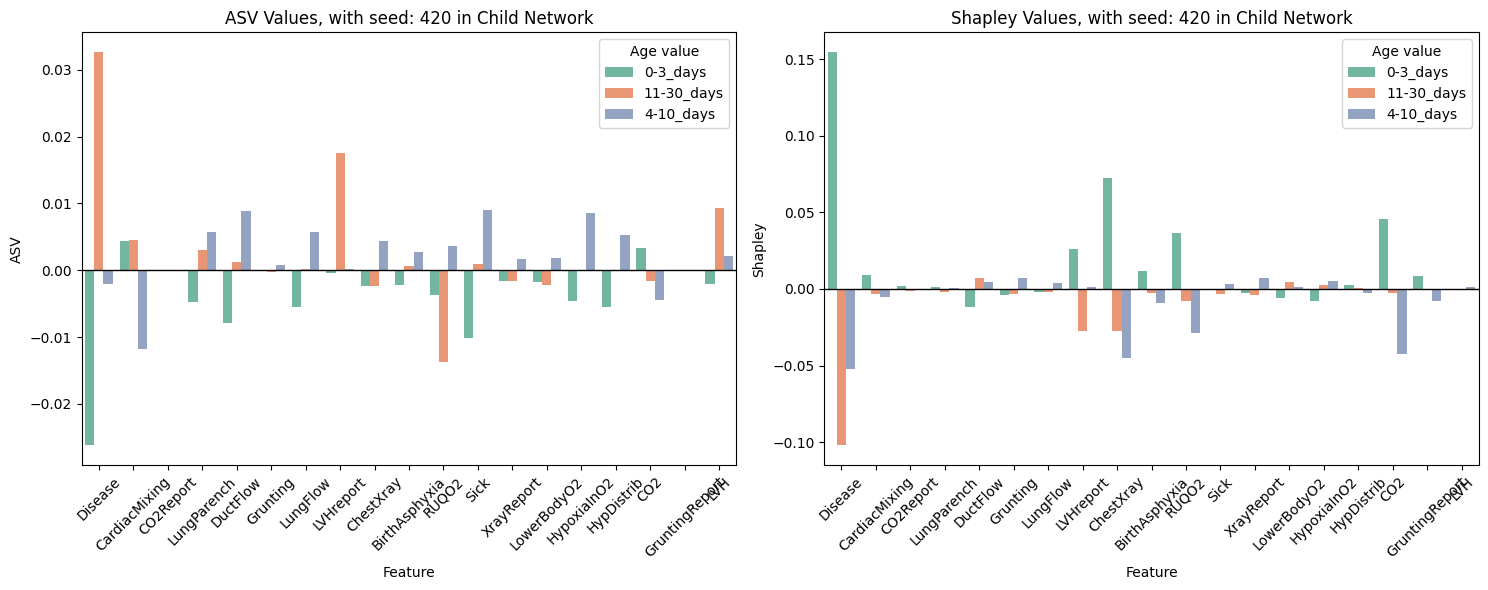

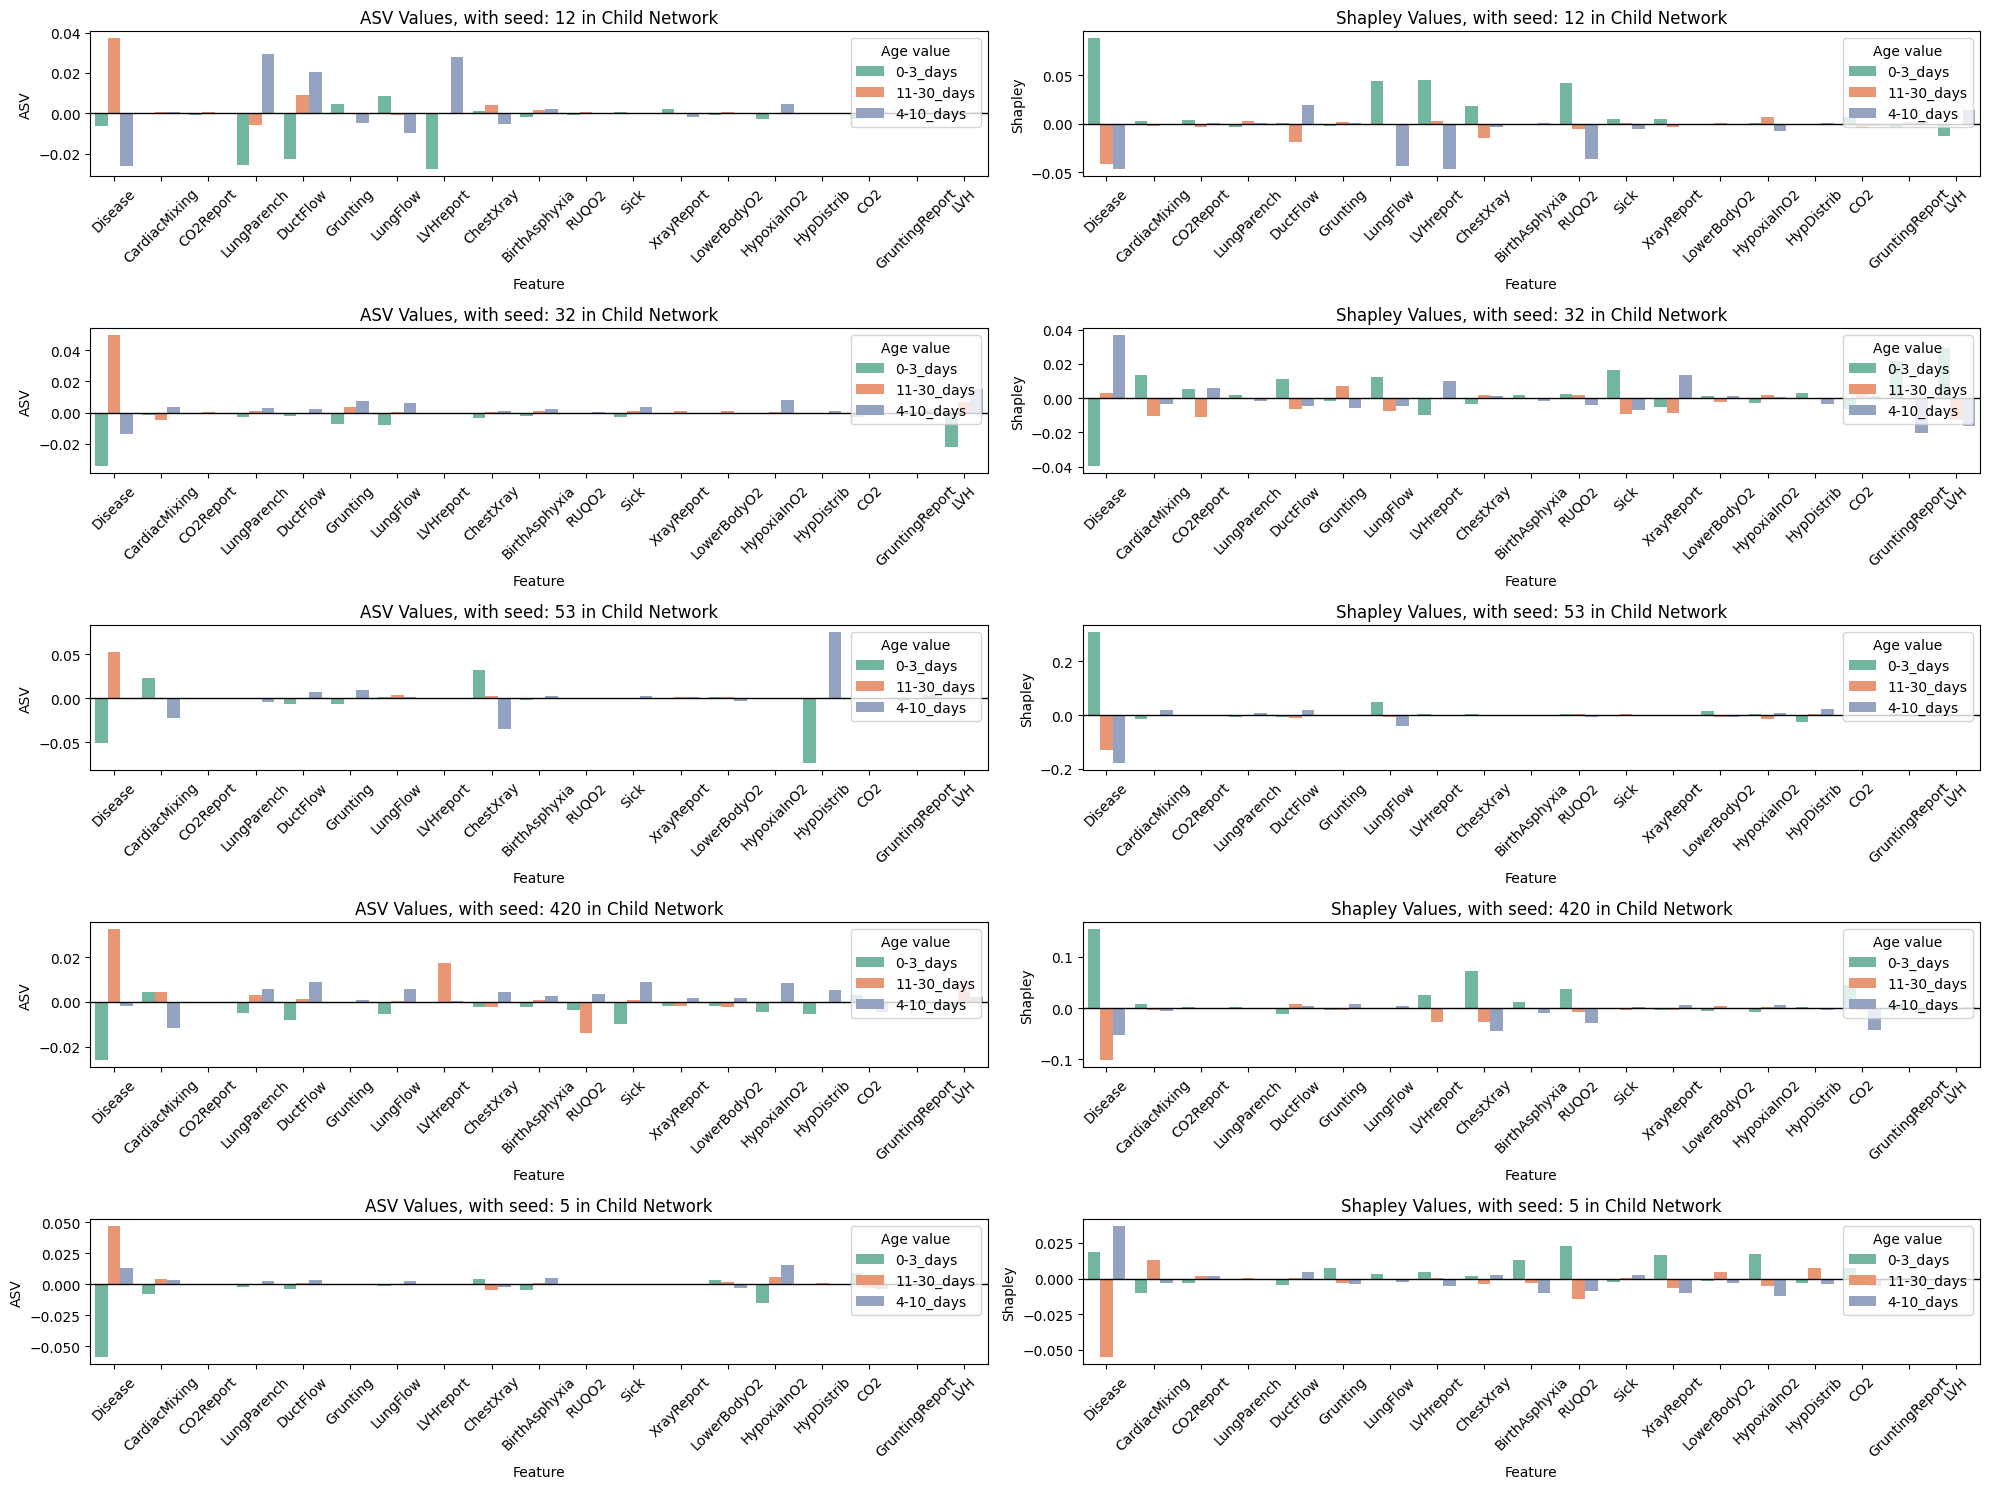

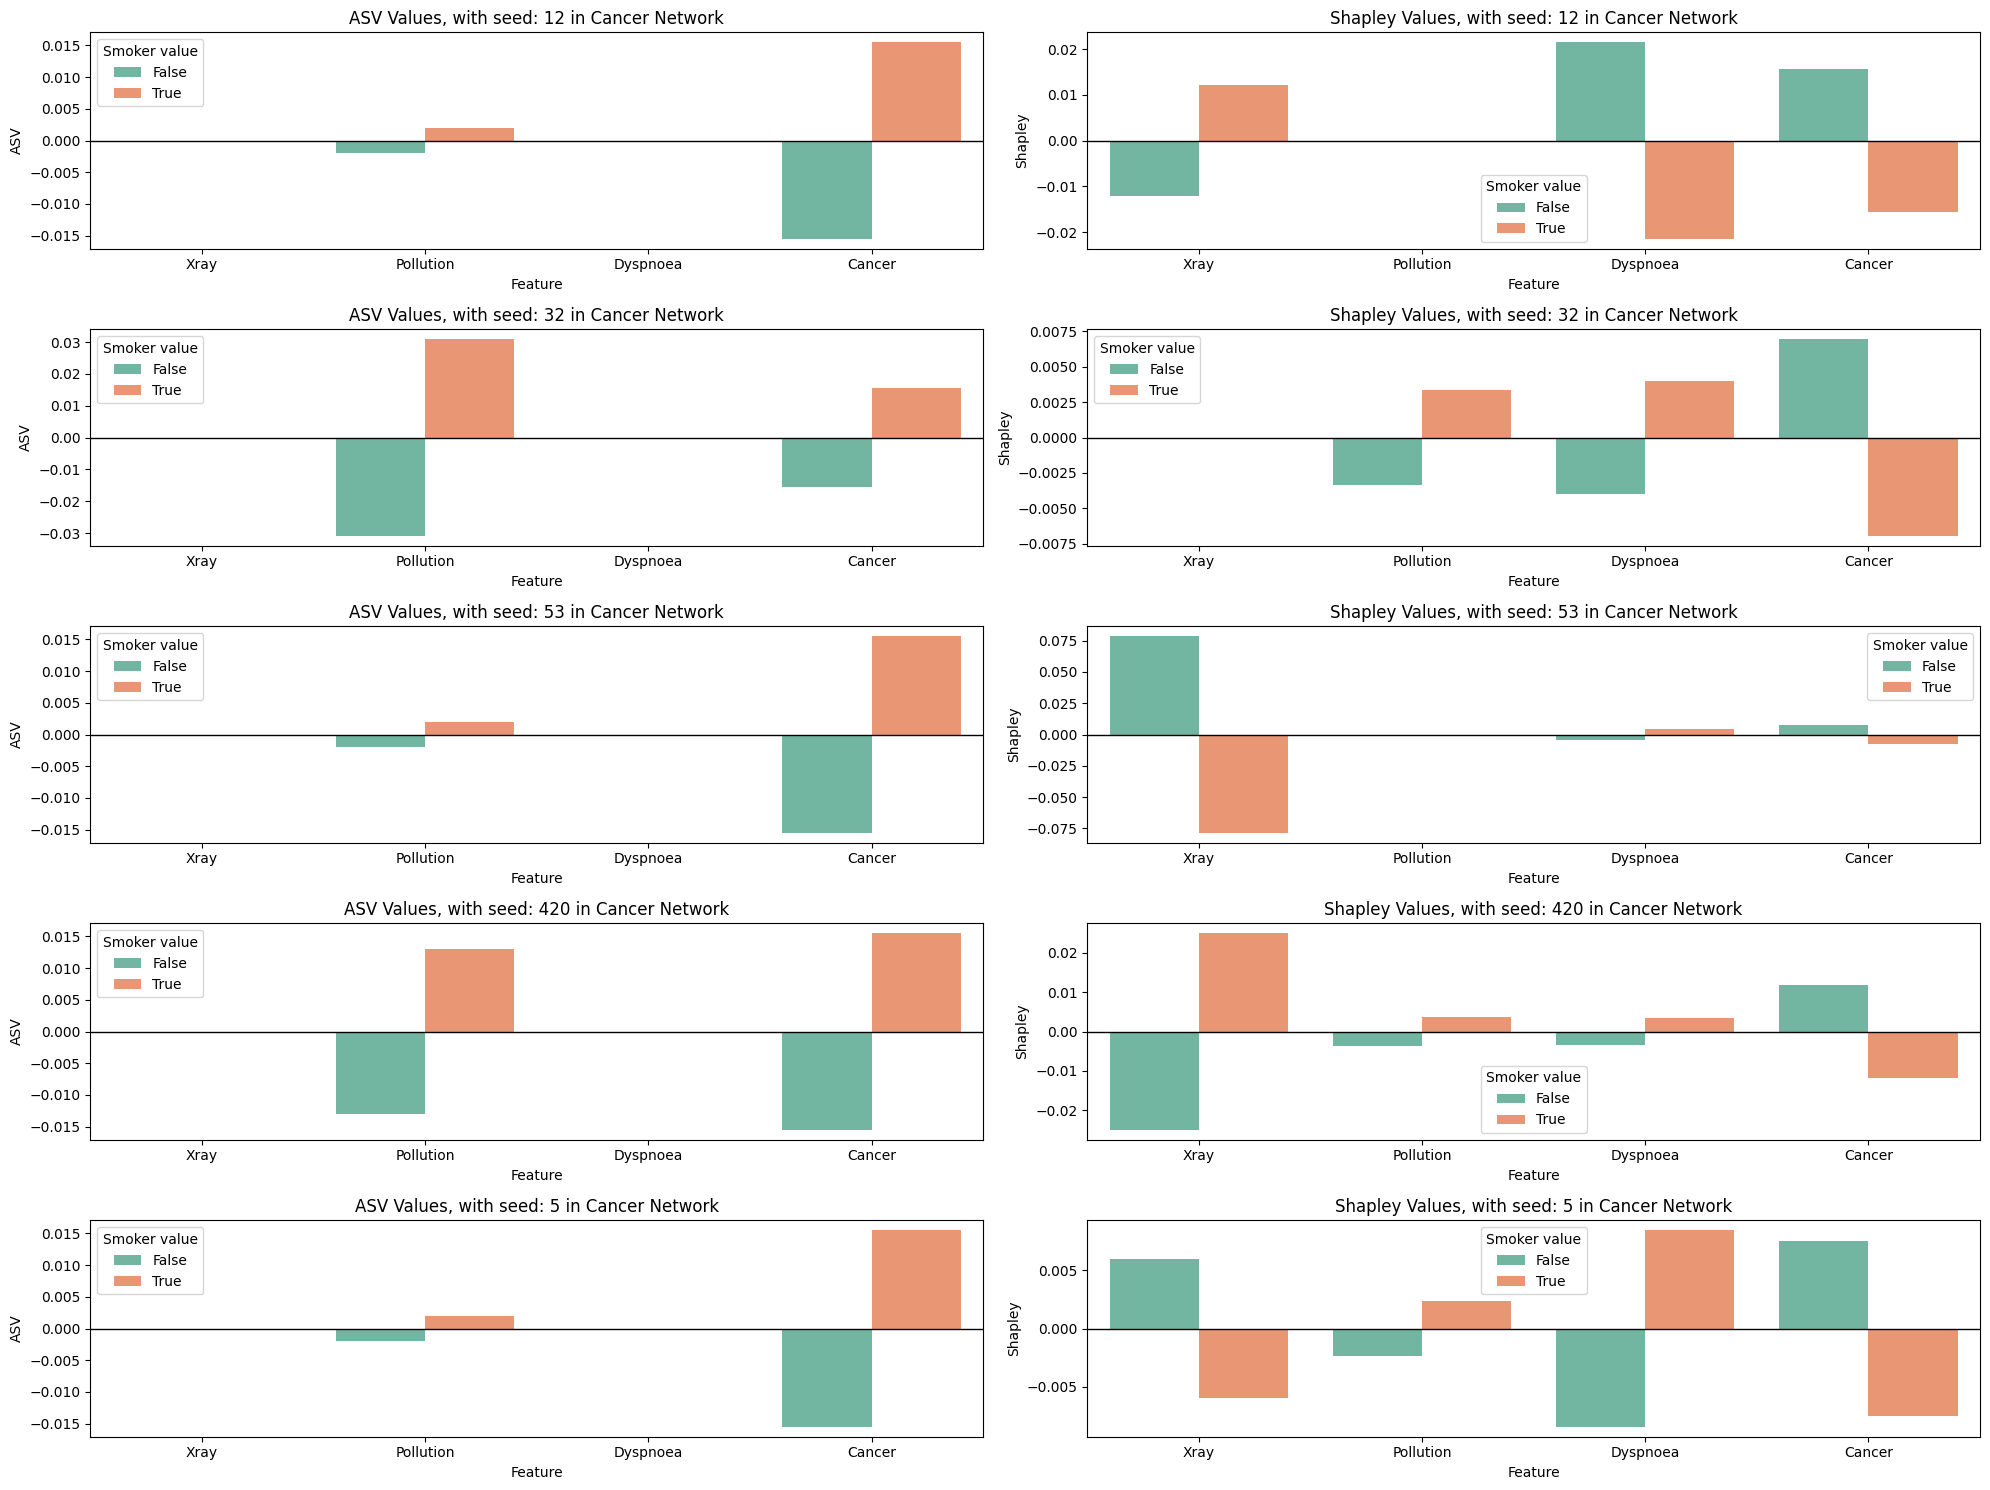

In [10]:
def plotValuesFromDF(ax, df, valueToPlot, hueValue, seed, paletteValue='Set2'):
    sns.barplot(x="Feature", y=valueToPlot, hue=hueValue, data=df, palette=paletteValue, ax=ax)
    ax.axhline(0, color="black", linewidth=1)
    bayesianNetwork = 'Cancer' if 'cancer' in df.name.lower() else 'Child'
    ax.set_title(f"{valueToPlot} Values, with seed: {seed} in {bayesianNetwork} Network")
    ax.set_ylabel(valueToPlot)
    ax.set_xlabel("Feature")
    if hueValue == 'Age value':
        ax.tick_params(axis='x', rotation=45)
    ax.legend(title=hueValue)

def plotASVandShapFromDF(df, hueValue, seed):
    _, axes = plt.subplots(1, 2, figsize=(15, 6))
    plotValuesFromDF(axes[0], df, 'ASV', hueValue, seed)
    plotValuesFromDF(axes[1], df, 'Shapley', hueValue, seed)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f"{plotsResultsFolder}{df.name}ASVAndShapley.png")
    plt.show()

def plotASVandShapForSeeds(seeds, dfDict, hueValue):
    _, axes = plt.subplots(len(seeds), 2, figsize=(20, 15))
    for i, seed in enumerate(seeds):
        df = dfDict[seed]
        plotValuesFromDF(axes[i][0], df, 'ASV', hueValue, seed)
        plotValuesFromDF(axes[i][1], df, 'Shapley', hueValue, seed)
    bayesianNetwork = 'cancer' if "Smoker value" == hueValue else 'child'
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f"{plotsResultsFolder}{bayesianNetwork}MultipleSeedsASVandShapley.png")
    plt.show()

plotASVandShapFromDF(dfCancerExactDict[12], 'Smoker value', 12)
plotASVandShapFromDF(dfChildExactDict[420], 'Age value', 420)

plotASVandShapForSeeds(seeds, dfChildExactDict, 'Age value')
plotASVandShapForSeeds(seeds, dfCancerExactDict, 'Smoker value')


## Analyzing Networks Probabilities

In [ ]:
from pgmpy.readwrite import BIFReader
from asvFormula.bayesianNetworks import networkSamplesPath
import pandas as pd
from pgmpy.inference import VariableElimination
import itertools

cancerNetworkPath = networkSamplesPath + "/cancer.bif"
completeCancerBNModel = BIFReader(cancerNetworkPath).get_model()

childNetworkPath = networkSamplesPath + "/child.bif"
completeChildBNModel = BIFReader(childNetworkPath).get_model()

In [ ]:
def possibleStatesFor(variable, bnModel):
    return bnModel.get_cpds(variable).state_names[variable]

# Function to add query results and compute differences
def add_query_rows(variable, values, variableToPredict, rows, bnModel):
    state_names = possibleStatesFor(variableToPredict, bnModel)
    probs = {state_val: {} for state_val in state_names}
    predictedProbColumn = f"phi({variableToPredict})"
    infer = VariableElimination(bnModel)

    predicted_prob = infer.query(variables=[variableToPredict])

    for val in values:
        result = infer.query(variables=[variableToPredict], evidence={variable: val})
        for i, state_val in enumerate(state_names):
            original_prob = predicted_prob.get_value(**{variableToPredict: state_val})
            prob = round(result.values[i], 4)
            probs[state_val][val] = prob

            rows.append({
                "Variable": variable,
                "Variable value" : val,
                variableToPredict: state_val,
                predictedProbColumn : prob,
                "Probability Shift" : round(abs(prob - original_prob), 4)
            })

def obtainProbabilityShifts(bnModel, variableToPredict):
    rows = []
    variables = list(bnModel.nodes)
    variables.remove(variableToPredict)
    for variable in variables:
        add_query_rows(variable, possibleStatesFor(variable, bnModel), variableToPredict, rows, bnModel)

    df = pd.DataFrame(rows)
    return df

cancerDf = obtainProbabilityShifts(completeCancerBNModel, "Smoker")
childDf = obtainProbabilityShifts(completeChildBNModel, "Age")

resultsFolder = "results/probabilityShifts/"
cancerDf.to_csv(resultsFolder + "cancerProbabilityShifts.csv")
childDf.to_csv(resultsFolder + "childProbabilityShifts.csv")

